# Pima Indian Diabetes Prediction

The aims of this project is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Logistic Regression and k-Nearest Neighbors are used as the prediction method.

***
Variables included in the dataset : 

* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age
* Outcome

***

Dataset source : https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Import Libraries

In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

plt.style.use('fivethirtyeight')

2. Load the dataset

In [2]:
df = pd.read_csv("dataset/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


3. Generate descriptive statistics of the dataset

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Show the class distribution and the skewness in the dataset

In [4]:
class_dist = df.groupby('Outcome').size()
print('Class Distribution : \n{}\n'.format(class_dist))
skew = df.skew()
print('Skew : \n{}\n'.format(skew))

Class Distribution : 
Outcome
0    500
1    268
dtype: int64

Skew : 
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64



5. Calculate the Pearson's correlation of each variables

In [5]:
df.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


6. Show the histogram plot of each variables

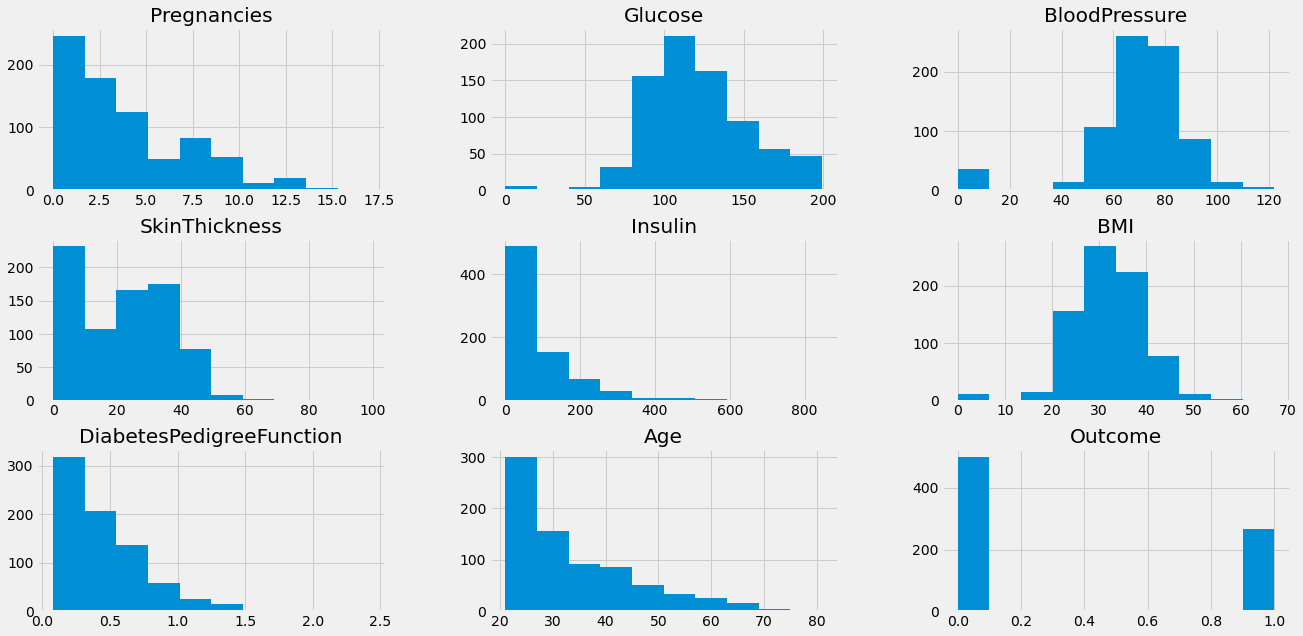

In [6]:
df.hist(figsize=(20,10));

7. Show the density plot of each variables

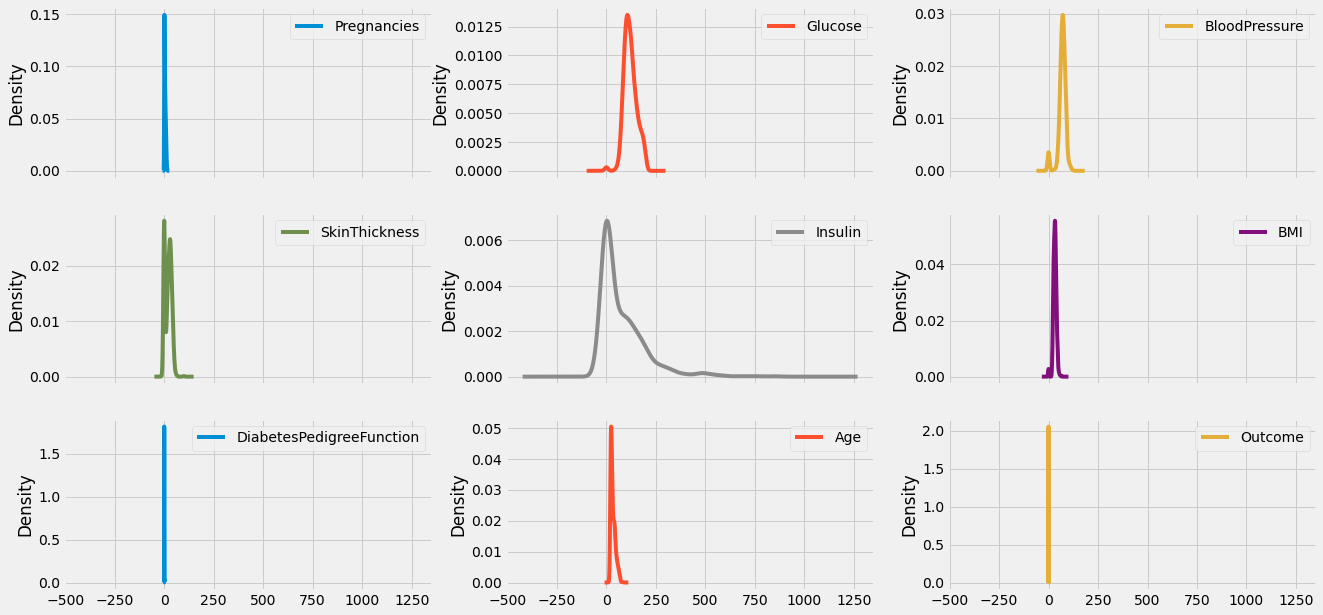

In [7]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20,10));

8. Split the dependent and independent variables in the dataset

In [8]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

9. Scales the independent variables

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

10. Split the dataset into the training and the testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


11. Create the logistic regression model

In [11]:
clf = LogisticRegression().fit(X_train, y_train.values.ravel())

12. Predict the training and the testing set

In [12]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Model accuracy on the training set : {}'.format(accuracy_score(y_train, train_pred)))
print('Model accuracy on the testing set : {}'.format(accuracy_score(y_test, test_pred)))

Model accuracy on the training set : 0.7703583061889251
Model accuracy on the testing set : 0.7532467532467533


13. Show the classification report of kNN and logistic regression model

In [13]:
print('Classification Report of Logistic Regression: \n\n {}'.format(classification_report(y_test, test_pred)))

Classification Report of Logistic Regression: 

               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



14. Visualize the confusion matrix of the logistic regression model

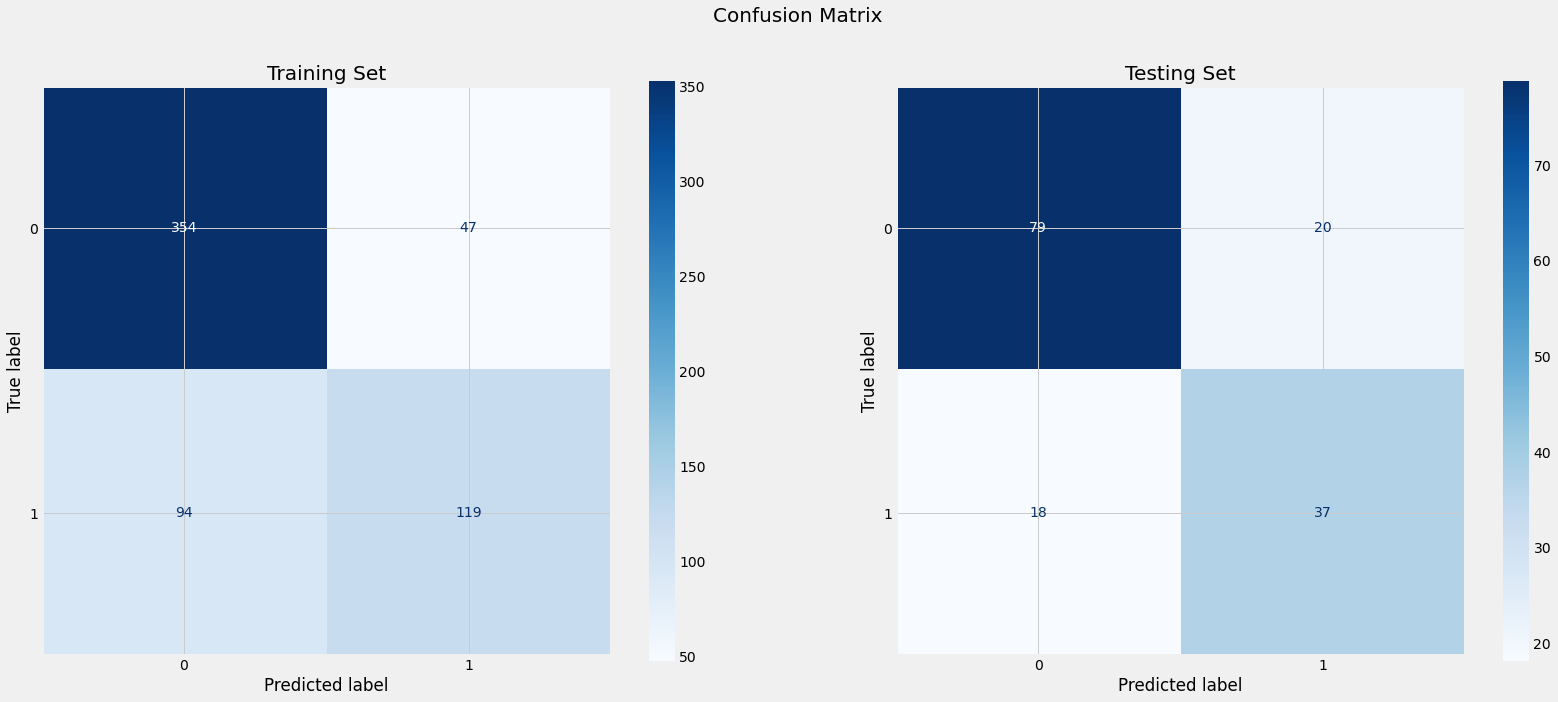

In [14]:
fig = plt.figure(figsize=(25,10))
fig.suptitle('Confusion Matrix', fontsize=20)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plot_confusion_matrix(clf, X_train, y_train, cmap=plt.cm.Blues, ax=ax1)

ax2 = plt.subplot(1,2,2)
ax2.set_title('Testing Set')
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax2)
plt.show()

Save the model

In [15]:
filename = 'model/diabetes_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Conclusion

The diabetes prediction model that was built using logistic regression was successfully trained with a high accuracy of 0.77. This model is also quite good at predicting the testing set, with an accuracy of 0.75.